In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble  import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving loan_prediction_dataset.csv to loan_prediction_dataset.csv


In [3]:
df


,ID,Age,Income,Loan_Amount,Credit_Score,Employment_Years,Loan_Approved
0,1,59,77761,503449,708,26,Yes
1,2,49,56368,337681,650,23,No
2,3,35,26783,544509,684,21,No
3,4,28,61914,596900,773,3,Yes
4,5,41,90507,275049,726,1,No
...,...,...,...,...,...,...,...
995,996,58,28927,582844,658,19,No
996,997,22,113680,398980,749,6,Yes
997,998,27,116546,100098,778,21,Yes
998,999,38,42443,424313,647,3,No


In [4]:
x=df.drop(['ID','Loan_Approved'],axis=1)
y=df['Loan_Approved']

In [5]:
encoder=LabelEncoder()
y_encoded=encoder.fit_transform(y)


In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y_encoded,test_size=0.2,random_state=42)

In [9]:
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [13]:
output=classifier.predict(xtest)
accuracy=accuracy_score(ytest,output)
precision=precision_score(ytest,output)
recall=recall_score(ytest,output)
f1=f1_score(ytest,output)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)



Accuracy: 0.995
Precision: 1.0
Recall: 0.9891304347826086
F1 Score: 0.994535519125683


In [15]:
df


,ID,Age,Income,Loan_Amount,Credit_Score,Employment_Years,Loan_Approved
0,1,59,77761,503449,708,26,Yes
1,2,49,56368,337681,650,23,No
2,3,35,26783,544509,684,21,No
3,4,28,61914,596900,773,3,Yes
4,5,41,90507,275049,726,1,No
...,...,...,...,...,...,...,...
995,996,58,28927,582844,658,19,No
996,997,22,113680,398980,749,6,Yes
997,998,27,116546,100098,778,21,Yes
998,999,38,42443,424313,647,3,No


In [20]:
AGE=int(input("ENTER THE AGE :"))
INCOME=int(input("ENTER THE INCOME :"))
LOAN_AMOUNT=int(input("ENTER THE LOAN AMOUNT :"))
CREDIT_SCORE=int(input("ENTER THE CREDIT SCORE :"))
EMPLOYEMENT_YEARS=int(input("ENTER THE EMPLOYEMENT YEARS :"))
new_data=[[AGE,INCOME,LOAN_AMOUNT,CREDIT_SCORE,EMPLOYEMENT_YEARS]]
output=classifier.predict(new_data)
output=encoder.inverse_transform(output)
print("THE LOAN STATUS IS :",output)

ENTER THE AGE :30
ENTER THE INCOME :600000
ENTER THE LOAN AMOUNT :40000
ENTER THE CREDIT SCORE :900
ENTER THE EMPLOYEMENT YEARS :10
THE LOAN STATUS IS : ['Yes']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


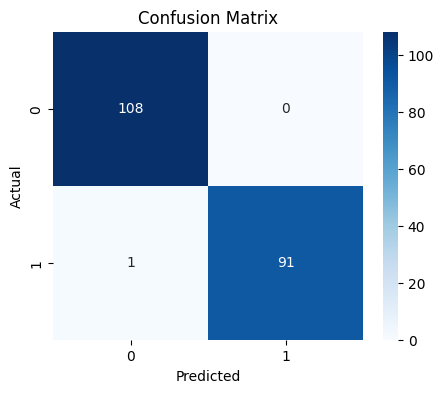

In [22]:
output=classifier.predict(xtest)
cm=confusion_matrix(ytest,output)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()